In [1]:
import re
import numpy as np
import cufflinks as cf
import pandas as pd

In [2]:
cf.go_offline()

# IPyWidgets

In [4]:
df = pd.read_csv('./data/churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['ChurnBinary'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

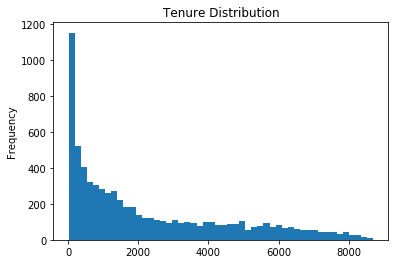

In [11]:
df['TotalCharges'].plot(kind='hist', bins=50, title='Tenure Distribution')

In [12]:
df['TotalCharges'].iplot(kind='hist', bins=50, title='Tenure Distribution')

In [50]:
def plot_graph(bins):
    df['TotalCharges'].iplot(kind='hist', bins=bins, title='Tenure Distribution')

In [51]:
from ipywidgets import interact

In [52]:
interact(plot_graph, bins=50)

interactive(children=(IntSlider(value=50, description='bins', max=150, min=-50), Output()), _dom_classes=('wid…

<function __main__.plot_graph>

In [53]:
interact(plot_graph, bins=(5,50, 5))

interactive(children=(IntSlider(value=25, description='bins', max=50, min=5, step=5), Output()), _dom_classes=…

<function __main__.plot_graph>

In [54]:
from ipywidgets import widgets

In [57]:
my_slider = widgets.IntSlider(
    value=10,
    min=5,
    max=100,
    step=5,
    description='bins:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


In [58]:
interact(plot_graph, bins=my_slider)

interactive(children=(IntSlider(value=10, continuous_update=False, description='bins:', min=5, step=5), Output…

<function __main__.plot_graph>

In [59]:
@interact(bins = my_slider, title = '')
def plot_graph(bins, title):
    df['TotalCharges'].iplot(kind='hist', bins=bins, title=title)

interactive(children=(IntSlider(value=100, continuous_update=False, description='bins:', min=5, step=5), Text(…

## Decorators

In [20]:
def my_function():
    print('Hello Andre')

In [22]:
my_function()

Hello Andre


In [27]:
def decorate_my_function(f):
    print('Before my function')
    f()
    print('After my function')

In [28]:
decorate_my_function(my_function)

Before my function
Hello Andre
After my function


In [31]:
@decorate_my_function
def my_function():
    print('Hello Andre')

Before my function
Hello Andre
After my function


----

In [60]:
@interact(churn = [True, False])
def plot_graph(churn):
    
    data = df.query(f'ChurnBinary == {churn}')
    
    data['TotalCharges'].iplot(kind='hist', bins=50, title='Tenure Distribution')

interactive(children=(Dropdown(description='churn', options=(True, False), value=True), Output()), _dom_classe…

In [64]:
list(df['PaymentMethod'].unique())

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [65]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1


In [66]:
list(df['gender'].unique())

['Female', 'Male']

In [68]:
df.loc[df['gender']=='Male',:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [69]:
@interact(var_gender=list(df['gender'].unique()))
def scatter(var_gender):
    
    # filtering data
    data = df.loc[(df['gender']==var_gender), :]

    data.iplot(kind='scatter', x='tenure', y='MonthlyCharges', 
               categories='Churn', text='customerID', 
               xTitle='Tenure', yTitle='Monthly Charges',
               title='Charges vs. Tenure')

interactive(children=(Dropdown(description='var_gender', options=('Female', 'Male'), value='Female'), Output()…

In [70]:
@interact(Gender=list(df['gender'].unique()), 
          Partner=list(df['Partner'].unique()),
          Internet=list(df['InternetService'].unique()), 
          Payment=list(df['PaymentMethod'].unique())
         )
def scatter(Gender, Partner, Internet, Payment):
    
    data = df.loc[(df['gender']==Gender) & 
                  (df['Partner']==Partner) & 
                  (df['InternetService']==Internet) & 
                  (df['PaymentMethod']==Payment)]

    data.iplot(kind='scatter', x='tenure', y='MonthlyCharges', 
               categories='Churn', text='customerID', 
               xTitle='Tenure', yTitle='Monthly Charges',
               title='Charges vs. Tenure')

interactive(children=(Dropdown(description='Gender', options=('Female', 'Male'), value='Female'), Dropdown(des…

In [72]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [78]:
@interact(Payment='')

def chart(Payment):
    import re
    
    # df['PaymentMethod'].apply(lambda x : re.search(Payment, x, flags=re.IGNORECASE))
    data = df.loc[df['PaymentMethod'].str.contains(Payment)]
    data = data.groupby('InternetService').agg({'MonthlyCharges':'sum'}).reset_index()
    data = data.iloc[data['InternetService'].argsort()].set_index('InternetService')
    
    data.iplot(kind='bar', xTitle='Values')

interactive(children=(Text(value='', description='Payment'), Output()), _dom_classes=('widget-interact',))

# This interactivity is not limited to plots

In [79]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary
Churn,,,,,
No,0.128721,37.569965,61.265124,2555.344141,0.0
Yes,0.254682,17.979133,74.441332,1531.796094,1.0


In [81]:
from IPython.display import display

def report_with_interact():
    @interact(gender=list(df['gender'].unique()),  
              payment=list(df['PaymentMethod'].unique()))
    def report(gender, payment):
        condition = (df.gender == gender) & (df.PaymentMethod == payment)
        data = df.loc[condition, :]
        display(data.groupby('Churn').mean())
    

In [122]:
report_with_interact()

interactive(children=(Dropdown(description='gender', options=('Female', 'Male'), value='Female'), Dropdown(des…

In [86]:
interact(report, gender=list(df['gender'].unique()),  
                 payment=list(df['PaymentMethod'].unique()))

interactive(children=(Dropdown(description='gender', options=('Female', 'Male'), value='Female'), Dropdown(des…

<function __main__.report>

In [90]:
names = pd.DataFrame(['Andre','Joao','Bla','Marcelo','Rafa'], columns=['name'])

In [93]:
variable = 'Andre'
names.query(f'name == "{variable}"')

,name
0,Andre


('Andre', 'Joao')

In [120]:
from IPython.display import display

def filter_name(variable):
    choices = tuple([name.strip() for name in variable.split(',')])
    
    display(names.query(f'name in {choices}'))

In [121]:
interact(filter_name, variable='')

interactive(children=(Text(value='', description='variable'), Output()), _dom_classes=('widget-interact',))

<function __main__.filter_name>

# Pandas Styling

In [143]:
data = df.query('gender == "Female" and SeniorCitizen == 1')

In [144]:
data.shape

(568, 22)

In [148]:
styler = data[['MonthlyCharges','TotalCharges','ChurnBinary']].sort_values(by='TotalCharges', ascending=False).style

In [149]:
type(data)

pandas.core.frame.DataFrame

In [150]:
styler.background_gradient()

In [152]:
styler.highlight_max(color='red')

In [138]:
from IPython.display import display

@interact(gender=list(df['gender'].unique()),  
          payment=list(df['PaymentMethod'].unique()))
         
def report(gender, payment):
    condition = (df.gender == gender) & (df.PaymentMethod == payment)
    data = df.loc[condition, :]
    display(data.groupby('Churn').mean().style.background_gradient(cmap='Greens'))


interactive(children=(Dropdown(description='gender', options=('Female', 'Male'), value='Female'), Dropdown(des…